In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# load labels
import pandas as pd

path = '/content/drive/MyDrive/Colab Notebooks/ML lab/Lab3/trec06c-utf8/label/index'
labels = pd.read_csv(path, sep =' ', header = None, names = ['label', 'source'])
labels.head(5)
labels

,label,source
0,spam,../data/000/000
1,ham,../data/000/001
2,spam,../data/000/002
3,spam,../data/000/003
4,spam,../data/000/004
...,...,...
64615,spam,../data/215/115
64616,spam,../data/215/116
64617,spam,../data/215/117
64618,spam,../data/215/118


In [3]:
# convert to numerical values
y = [ 1 if labels.loc[i,'label'] == 'spam' else 0 for i in range(len(labels)) ]
y.count(1)

42854

In [4]:
# load corpora
import os

data_cut = '/content/drive/MyDrive/Colab Notebooks/ML lab/Lab3/trec06c-utf8/data_cut'
folders = os.listdir(data_cut)
folders.sort(key=int) # the order is messed up upon reading files from google drive
# print(folders)

emails_h = []
emails_noh = []
for folder in folders:
    subpath = data_cut +'/'+folder
    files = os.listdir(subpath)
    files.sort(key=int) # the order is messed up upon reading files from google drive
    # print(files)

    for file in files:
        filepath = subpath + '/' + file
        email_h = "" # with header
        email_noh = "" # without header
        header = True # flag to find out the header boundary
        with open(filepath, "r", encoding = 'utf-8') as f:
            lines = f.readlines()
            for line in lines:
                if line == '\n': header = False
                if header: 
                    email_h += line.strip('\t').replace('\n', ' ')
                    continue
                email_h += line.strip('\t').replace('\n', ' ')
                email_noh += line.strip('\t').replace('\n', ' ')
            emails_h.append(email_h)
            emails_noh.append(email_noh)            
            
print(emails_h[0])
print(emails_noh[0])
            

Received: from hp-5e1fe6310264 ([218.79.188.136]) by spam-gw.ccert.edu.cn (MIMEDefang) with ESMTP id j7CAoGvt023247 for <lu@ccert.edu.cn>; Sun, 14 Aug 2005 09:59:04 +0800 (CST) Message-ID: <200508121850.j7CAoGvt023247@spam-gw.ccert.edu.cn> From: "yan"<(8月27-28,上海)培训课程> Reply-To: yan@vip.163.com"<b4a7r0h0@vip.163.com> To: lu@ccert.edu.cn Subject: =?gb2312?B?t8eyxs7xvq3A7bXEssbO8bncwO0to6jJs8XMxKPE4qOp?= Date: Tue, 30 Aug 2005 10:08:15 +0800 MIME-Version: 1.0 Content-type: multipart/related;     type="multipart/alternative";     boundary="----=_NextPart_000_004A_2531AAAC.6F950005" X-Priority: 3 X-MSMail-Priority: Normal X-Mailer: Microsoft Outlook Express 6.00.2800.1158 X-MimeOLE: Produced By Microsoft MimeOLE V6.00.2800.1441  [ 课   程   背   景 ]  　 每 一位 管理 和 技术人员 都 清楚 地 懂得 ， 单纯 从 技术 角度 衡量 为 合算 的 方案 ， 也许 却是 一个 财务 陷阱 ， 表面 赢利 而 暗地里 亏损 ， 使经 营者 无法 接受 。 如何 将 技术手段 与 财务 运作 相结合 ， 使 每位 管理 和 技术人员 都 从 本 课程 通过 沙盘 模拟 和 案例 分析 ， 使 企业 各级 管理 和 技术人员 掌握 财务管理 知识 ， 利用 财务 信息 改进 管理决策 ， 实现 管理 效益 最大化 。 通过 学习 本 课程 

In [5]:
# First Model(Model 1): CountVectorizer + emails without header + MultinomialNB
# Use CountVectorizer extract text features
from sklearn.feature_extraction.text import CountVectorizer
countvectorizer = CountVectorizer()
X_noh = countvectorizer.fit_transform(emails_noh)
print("Number of features: ", len(countvectorizer.get_feature_names_out()))


Number of features:  196902


In [6]:
# split the data set
from sklearn.model_selection  import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
RANDOM_SEED = 2021
x_noh_train, x_noh_test, y_noh_train, y_noh_test = train_test_split(X_noh, y, test_size = 0.2, random_state = RANDOM_SEED)

In [7]:
# build the first model
from sklearn.naive_bayes import MultinomialNB
mnb_noh = MultinomialNB()
mnb_noh.fit(x_noh_train, y_noh_train)
p_noh_test = mnb_noh.predict(x_noh_test)

In [8]:
# check scores
print(p_noh_test)
print("accuracy_score: ", accuracy_score(y_noh_test, p_noh_test))
print("precision_score: ", precision_score(y_noh_test, p_noh_test))
print("recall_score: ", recall_score(y_noh_test, p_noh_test))
print("f1_score: ", f1_score(y_noh_test, p_noh_test))

[0 1 1 ... 1 1 0]
accuracy_score:  0.9764778706282885
precision_score:  0.981903093987157
recall_score:  0.9825914242318028
f1_score:  0.9822471385190376


In [9]:
# check false positive rate
def confusion_matrix(y_true, y_pred):
    assert(len(y_true) == len(y_pred))
    fp_count = 0
    fn_count = 0
    tp_count = 0
    tn_count = 0
    tot = len(y_pred)
    for i in range(tot):
        if (y_true[i] == 0) and (y_pred[i] == 1):
            fp_count += 1
        if (y_true[i] == 1) and (y_pred[i] == 0):
            fn_count += 1
        if (y_true[i] == 1) and (y_pred[i] == 1):
            tp_count += 1
        if (y_true[i] == 0) and (y_pred[i] == 0):
            tn_count += 1
    assert(fp_count+fn_count+tp_count+tn_count == tot)
    return tp_count/tot, tn_count/tot, fp_count/tot, fn_count/tot

tp, tn, fp, fn = confusion_matrix(y_noh_test, p_noh_test)
# print((tp+tn)/(tp+tn+fp+fn))

print("False postive rate: ", fp)

False postive rate:  0.011993190962550294


In [10]:
# Model 2. CountVectorizer + emails with header + MultinomialNB
countvectorizer = CountVectorizer()
X_h = countvectorizer.fit_transform(emails_h)
print("Number of features: ", len(countvectorizer.get_feature_names_out()))
MAX_FEATURES = len(countvectorizer.get_feature_names_out())
x_h_train, x_h_test, y_h_train, y_h_test = train_test_split(X_h, y, test_size = 0.2, random_state = RANDOM_SEED)
mnb_h = MultinomialNB()
mnb_h.fit(x_h_train, y_h_train)
p_h_test = mnb_h.predict(x_h_test)

print("accuracy_score: ", accuracy_score(y_h_test, p_h_test))
print("precision_score: ", precision_score(y_h_test, p_h_test))
print("recall_score: ", recall_score(y_h_test, p_h_test))
print("f1_score: ", f1_score(y_h_test, p_h_test))

tp, tn, fp, fn = confusion_matrix(y_h_test, p_h_test)
print("False postive rate: ", fp)

Number of features:  322038
accuracy_score:  0.9865366759517178
precision_score:  0.9957431713373537
recall_score:  0.9838766211005958
f1_score:  0.9897743300423131
False postive rate:  0.002785515320334262


In [11]:
# Model 3. tfidfvectorizer + emails with header + MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfvectorizer = TfidfVectorizer()
X_h = tfidfvectorizer.fit_transform(emails_h)
print("Number of features: ", len(tfidfvectorizer.get_feature_names_out()))
x_h_train, x_h_test, y_h_train, y_h_test = train_test_split(X_h, y, test_size = 0.2, random_state = RANDOM_SEED)
mnb_h = MultinomialNB()
mnb_h.fit(x_h_train, y_h_train)
p_h_test = mnb_h.predict(x_h_test)

print("accuracy_score: ", accuracy_score(y_h_test, p_h_test))
print("precision_score: ", precision_score(y_h_test, p_h_test))
print("recall_score: ", recall_score(y_h_test, p_h_test))
print("f1_score: ", f1_score(y_h_test, p_h_test))

tp, tn, fp, fn = confusion_matrix(y_h_test, p_h_test)
print("False postive rate: ", fp)

Number of features:  322038
accuracy_score:  0.9915660786134324
precision_score:  0.9919655333022822
recall_score:  0.9953265568407524
f1_score:  0.9936432028926343
False postive rate:  0.005338904363974002


In [12]:
# inspect the top 20 most frequent features
countvectorizer = CountVectorizer(max_features = 30)
tfidfvectorizer = TfidfVectorizer(max_features = 30)
cv_fit = countvectorizer.fit_transform(emails_noh)
tv_fit = tfidfvectorizer.fit_transform(emails_noh)
count_tokens = countvectorizer.get_feature_names_out()
tfidf_tokens = tfidfvectorizer.get_feature_names_out()
df_countvect = pd.DataFrame(data = cv_fit.toarray(), columns = count_tokens)
df_tfidfvect = pd.DataFrame(data = tv_fit.toarray(), columns = tfidf_tokens)
print("Count Vectorizer\n")
print(df_countvect)
print("\nTD-IDF Vectorizer\n")
print(df_tfidfvect)


Count Vectorizer

       10  2005  com  http  www  一个  中国  什么  ...  有限公司  服务  没有  管理  网站  自己  这个  问题
0       0     0    1     0    0   1   1   0  ...     0   0   0  16   0   0   0   0
1       0     0    0     0    0   2   0   0  ...     0   0   0   0   0   0   0   0
2       0     0    1     0    0   0   0   0  ...     2   1   0   0   0   0   0   0
3       0     0    0     0    0   0   0   0  ...     0   1   0   0   0   0   0   0
4      13     0   15    10   12  28   7  13  ...     0   0  12   1  26  19  28  21
...    ..   ...  ...   ...  ...  ..  ..  ..  ...   ...  ..  ..  ..  ..  ..  ..  ..
64615   0     0    1     0    0   0   0   0  ...     2   1   0   0   0   0   0   0
64616   0     0    1     0    0   0   0   0  ...     1   1   0   0   0   0   0   0
64617   0     0    1     0    0   0   0   0  ...     1   0   0   0   0   0   0   0
64618   0     0    0     0    0   1   0   0  ...     0   0   0   0   0   0   0   0
64619   0     0    1     0    0   0   0   0  ...     1   0   0   0   

In [13]:
# inspect the sorted top 20 tfidf-ranked words
import numpy as np

def get_top_frequent_words(response, top_n, vectorizer):
    feature_array = np.array(vectorizer.get_feature_names_out())
    sorting = np.argsort(response.toarray()).flatten()[::-1]
    return feature_array[sorting][:top_n]

print("TF-IDF:")
print(get_top_frequent_words(tv_fit, 30, tfidfvectorizer))  
print("TF:")
print(get_top_frequent_words(cv_fit, 30, countvectorizer))  

TF-IDF:
['发票' '公司' '合作' '可以' '信息' '优惠' '有限公司' 'com' '2005' 'http' 'www' '一个' '中国'
 '什么' '企业' '分析' '问题' '这个' '咨询' '培训' '如何' '如果' '工作' '我们' '服务' '没有' '管理'
 '网站' '自己' '10']
TF:
['公司' '发票' '可以' '合作' 'com' '有限公司' '优惠' '信息' '2005' 'http' 'www' '一个' '中国'
 '什么' '企业' '分析' '问题' '这个' '咨询' '培训' '如何' '如果' '工作' '我们' '服务' '没有' '管理'
 '网站' '自己' '10']


In [14]:
# vary the number of features in the vocabulary
acc_scores = []
prec_scores = []
recall_scores = []
f1_scores = []
fp_rates = []
feature_number = []
for exp in range(2, 20):
    numOfFeatures = 2**exp
    if numOfFeatures > 2*MAX_FEATURES: break
    feature_number.append(numOfFeatures)
    tv = TfidfVectorizer(max_features = numOfFeatures)
    X_h = tv.fit_transform(emails_h)
    print("Number of features: ", len(tv.get_feature_names_out()))
    x_h_train, x_h_test, y_h_train, y_h_test = train_test_split(X_h, y, test_size = 0.2, random_state = RANDOM_SEED)
    mnb_h = MultinomialNB()
    mnb_h.fit(x_h_train, y_h_train)
    p_h_test = mnb_h.predict(x_h_test)
    acc = accuracy_score(y_h_test, p_h_test)
    print("accuracy_score: ", acc)
    acc_scores.append(acc)
    prec = precision_score(y_h_test, p_h_test)
    print("precision_score: ", prec)
    prec_scores.append(prec)
    r = recall_score(y_h_test, p_h_test)
    print("recall_score: ", r)
    recall_scores.append(r)
    f1 = f1_score(y_h_test, p_h_test)
    print("f1_score: ", f1)
    f1_scores.append(f1)
    tp, tn, fp, fn = confusion_matrix(y_h_test, p_h_test)
    print("False positive rate: ", fp)
    fp_rates.append(fp)
    

Number of features:  4
accuracy_score:  0.6622562674094707
precision_score:  0.6622562674094707
recall_score:  1.0
f1_score:  0.7968160871386678
False positive rate:  0.33774373259052926
Number of features:  8
accuracy_score:  0.6622562674094707
precision_score:  0.6622562674094707
recall_score:  1.0
f1_score:  0.7968160871386678
False positive rate:  0.33774373259052926
Number of features:  16
accuracy_score:  0.8300061900340452
precision_score:  0.7961824953445065
recall_score:  0.9990653113681505
f1_score:  0.8861599046582724
False positive rate:  0.16937480656143608
Number of features:  32
accuracy_score:  0.8418446301454658
precision_score:  0.8141575851094609
recall_score:  0.9863301787592008
f1_score:  0.8920118343195267
False positive rate:  0.14910244506344786
Number of features:  64
accuracy_score:  0.9261064685855772
precision_score:  0.9114718614718614
recall_score:  0.9839934571795771
f1_score:  0.9463453002977695
False positive rate:  0.06329309811203962
Number of feature

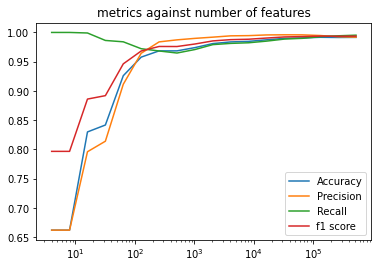

In [15]:
# plot the graph
import matplotlib.pyplot as plt
plt.plot(feature_number, acc_scores, label='Accuracy')
plt.plot(feature_number, prec_scores, label='Precision')
plt.plot(feature_number, recall_scores, label='Recall')
plt.plot(feature_number, f1_scores, label='f1 score')
plt.xscale("log")
plt.legend()
plt.title("metrics against number of features")
plt.show()

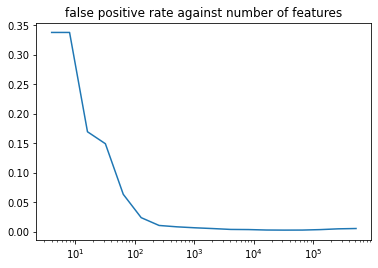

In [16]:
# inspect the variation of false positive rate with respect to number of features
plt.plot(feature_number, fp_rates, label="false positive rate")
plt.xscale("log")
plt.title("false positive rate against number of features")
plt.show()

In [17]:
# Model 4. tfidfvectorizer + emails without header + MultinomialNB
tfidfvectorizer = TfidfVectorizer()
X_noh = tfidfvectorizer.fit_transform(emails_noh)
print("Number of features: ", len(tfidfvectorizer.get_feature_names_out()))
x_noh_train, x_noh_test, y_noh_train, y_noh_test = train_test_split(X_noh, y, test_size = 0.2, random_state = RANDOM_SEED)
mnb_noh = MultinomialNB()
mnb_noh.fit(x_noh_train, y_noh_train)
p_noh_test = mnb_noh.predict(x_noh_test)

print("accuracy_score: ", accuracy_score(y_noh_test, p_noh_test))
print("precision_score: ", precision_score(y_noh_test, p_noh_test))
print("recall_score: ", recall_score(y_noh_test, p_noh_test))
print("f1_score: ", f1_score(y_noh_test, p_noh_test))

tp, tn, fp, fn = confusion_matrix(y_noh_test, p_noh_test)
print("False postive rate: ", fp)

Number of features:  196902
accuracy_score:  0.9783348808418446
precision_score:  0.9769558704919922
recall_score:  0.9906531136815049
f1_score:  0.9837568163360019
False postive rate:  0.01547508511296812


In [18]:
# Compare models using different probability distributions
from sklearn.naive_bayes import BernoulliNB, ComplementNB

# Model 5. Countvectorizer + no header + BernoulliNB
countvectorizer = CountVectorizer()
X_noh = countvectorizer.fit_transform(emails_noh)
print("Number of features: ", len(countvectorizer.get_feature_names_out()))
x_noh_train, x_noh_test, y_noh_train, y_noh_test = train_test_split(X_noh, y, test_size = 0.2, random_state = RANDOM_SEED)
bnb_noh = BernoulliNB()
bnb_noh.fit(x_noh_train, y_noh_train)
p_noh_test = bnb_noh.predict(x_noh_test)

print("accuracy_score: ", accuracy_score(y_noh_test, p_noh_test))
print("precision_score: ", precision_score(y_noh_test, p_noh_test))
print("recall_score: ", recall_score(y_noh_test, p_noh_test))
print("f1_score: ", f1_score(y_noh_test, p_noh_test))

tp, tn, fp, fn = confusion_matrix(y_noh_test, p_noh_test)
print("False postive rate: ", fp)

Number of features:  196902
accuracy_score:  0.9462240792324358
precision_score:  0.9835218888342351
recall_score:  0.9344549596915528
f1_score:  0.958360793241867
False postive rate:  0.01036830702568864


In [19]:
# Model 6. Countvectorizer + no header + ComplementNB
# because the dataset is unbalanced
countvectorizer = CountVectorizer()
X_noh = countvectorizer.fit_transform(emails_noh)
print("Number of features: ", len(countvectorizer.get_feature_names_out()))
x_noh_train, x_noh_test, y_noh_train, y_noh_test = train_test_split(X_noh, y, test_size = 0.2, random_state = RANDOM_SEED)
cnb_noh = ComplementNB()
cnb_noh.fit(x_noh_train, y_noh_train)
p_noh_test = cnb_noh.predict(x_noh_test)

print("accuracy_score: ", accuracy_score(y_noh_test, p_noh_test))
print("precision_score: ", precision_score(y_noh_test, p_noh_test))
print("recall_score: ", recall_score(y_noh_test, p_noh_test))
print("f1_score: ", f1_score(y_noh_test, p_noh_test))

tp, tn, fp, fn = confusion_matrix(y_noh_test, p_noh_test)
print("False postive rate: ", fp)

Number of features:  196902
accuracy_score:  0.9708294645620551
precision_score:  0.9827708284163323
recall_score:  0.9730108657553452
f1_score:  0.9778664944519463
False postive rate:  0.011296812132466728


In [27]:
# try to implement MultinomialNB
class MultinomialNaiveBayes(object):
  def __init__(self):

    # records of the conditional probabilities for each word in vocabulary
    self._parameters_spam = None
    self._parameters_ham = None

    # the priors
    self._p_spam = None
    self._p_ham = None



  def fit(self, X, y):
    # Naive Bayes:
    # P(Spam|w1,w2,...,wn) is proportional to  P(Spam)·[P(w1|Spam)P(w2|Spam)...P(wn|Spam)]
    # P(Ham|w1,w2,...,wn) is proportional to P(Ham)·[P(w1|Ham)P(w2|Ham)...P(wn|Ham)]

    # 1. calculate P(Spam) and P(Ham)
    numOfSpam = y.count(1)
    numOfHam = len(y) - numOfSpam
    self._p_spam = numOfSpam/len(y_h_train)
    self._p_ham = numOfHam/len(y_h_train)

    # 2. calculate P(wi|Spam) and P(wi|Ham) using multinomial formula
    numOfDocs, numOfVocab = X.get_shape()

    spam_word_count = np.zeros(numOfVocab)
    ham_word_count = np.zeros(numOfVocab)
    tot_spam_word_count = 0
    tot_ham_word_count = 0
    for i in range(len(y)):
      if y[i] == 1:
        tot_spam_word_count+=X.getrow(i).sum()
        spam_word_count += X.getrow(i).toarray()[0]
      else:
        tot_ham_word_count+=X.getrow(i).sum()
        ham_word_count += X.getrow(i).toarray()[0]

    # assume Laplace smoothing
    alpha = 1

    # 3. compute the probability for each word given the class
    self._parameters_spam = (spam_word_count + alpha) / (tot_spam_word_count + alpha*numOfVocab)
    self._parameters_ham = (ham_word_count + alpha) / (tot_ham_word_count + alpha * numOfVocab)



  def predict(self, X):
    numOfDocs, numOfVocab = X.get_shape()
    predictions = np.zeros(numOfDocs)

    cx = X.tocoo()
    for doc_index in range(numOfDocs):
      # the posteriors
      p_spam_given_word = np.log(self._p_spam)
      p_ham_given_word = np.log(self._p_ham)
      # indices = np.where((X.getrow(doc_index).toarray()[0])>0)
      for word_index in range(numOfVocab):
        # if word is present in the document
        if X[doc_index, word_index]>0:
          if self._parameters_spam[word_index]>0:
            p_spam_given_word += np.log(self._parameters_spam[word_index])
          if self._parameters_ham[word_index]>0:
            p_ham_given_word += np.log(self._parameters_ham[word_index])

      if p_spam_given_word > p_ham_given_word:
        predictions[doc_index] = 1
      else:
        predictions[doc_index] = 0

    return predictions
    

In [30]:
# test the model
countvectorizer = CountVectorizer()
X_h = countvectorizer.fit_transform(emails_h[:1000])
print("Number of features: ", len(countvectorizer.get_feature_names_out()))
# print(countvectorizer.vocabulary_)
x_h_train, x_h_test, y_h_train, y_h_test = train_test_split(X_h, y[:1000], test_size = 0.2, random_state = RANDOM_SEED)

Number of features:  24073


In [31]:
mnb_h = MultinomialNaiveBayes()
mnb_h.fit(x_h_train, y_h_train)
p_h_test = mnb_h.predict(x_h_test)

print("accuracy_score: ", accuracy_score(y_h_test, p_h_test))
print("precision_score: ", precision_score(y_h_test, p_h_test))
print("recall_score: ", recall_score(y_h_test, p_h_test))
print("f1_score: ", f1_score(y_h_test, p_h_test))

tp, tn, fp, fn = confusion_matrix(y_h_test, p_h_test)
print("False postive rate: ", fp)

accuracy_score:  0.99
precision_score:  1.0
recall_score:  0.9874213836477987
f1_score:  0.9936708860759493
False postive rate:  0.0
